# Calculando π por simulação

<img src="imagens/canhao-circulo.png" width="500">

Imagine um canhão disparando aleatoriamente sobre um campo quadrado com um círculo inscrito. Se o quadrado tem 2 unidades de lado então o raio do círculo é 1 e sua área é **π**.

Após **n** disparos, a quantidade de balas dentro do círculo (**d**) será proporcional a **π**, conforme essa fórmula:

$$
\frac{π}{4}=\frac{d}{n}
$$

Então valor de **π** pode ser aproximado assim:

$$
π = \frac{4 \cdot d}{n}
$$

Para começar, vamos gerar valores para as coordenadas dos "disparos":

In [1]:
import random

def rnd(n):
    return [random.uniform(-1, 1) for _ in range(n)]

NUM_PONTOS = 5000
x = rnd(NUM_PONTOS)
y = rnd(NUM_PONTOS)

Agora podemos selecionar os pares de coordenadas dentro e fora do círculo:

In [2]:
def pares(seq1, seq2):
    sim1, sim2, nao1, nao2 = [], [], [], []
    for a, b in zip(seq1, seq2):
        if (a*a + b*b)**.5 <= 1:
            sim1.append(a)
            sim2.append(b)
        else:
            nao1.append(a)
            nao2.append(b)
    return sim1, sim2, nao1, nao2

x_sim, y_sim, x_nao, y_nao = pares(x, y)

Agora, plotamos os disparos dentro do círculo em azul, e fora em vermelho:

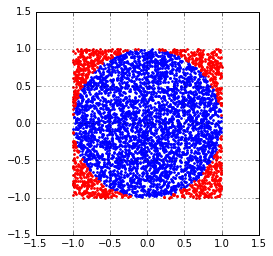

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.axes().set_aspect('equal')
plt.grid()
plt.scatter(x_sim, y_sim, 3, color='b')
plt.scatter(x_nao, y_nao, 3, color='r')

Agora podemos ver a aproximação de **π** produzida com os parâmetros acima:

$$
π = \frac{4 \cdot d}{n}
$$

In [4]:
4 * len(x_sim) / NUM_PONTOS

3.1416

In [5]:
def pi(n):
    uni = random.uniform
    c = 0
    i = 0
    while i < n:
        if abs(complex(uni(-1, 1), uni(-1, 1))) <= 1:
            c += 1
        i += 1
    return c * 4.0 / n

Para mostrar como a razão **d/n** se aproxima de **π** à medida que **n** aumenta, usei este laço:

```python
res = []
for i in range(10):
    n = 10**i
    res.append((n, pi(n)))

res
```

O demorou mais de 25 minutos em meu notebook para gerar os dados a seguir:

In [6]:
res = [
 (1, 4.0),
 (10, 2.8),
 (100, 3.24),
 (1000, 3.096),
 (10000, 3.1248),
 (100000, 3.14144),
 (1000000, 3.142716),
 (10000000, 3.1410784),
 (100000000, 3.14149756),
 (1000000000, 3.141589804)
]

Com esses dados, o gráfico mostra a aproximação de **π** (a linha vermelha):

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

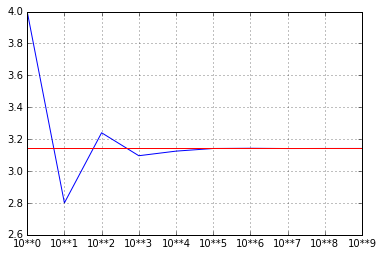

In [15]:
import math

plt.figure()
x, y = zip(*res)
x = [round(math.log(n, 10)) for n in x]
plt.plot(x, y)
plt.axhline(math.pi, color='r')
plt.grid()
plt.xticks(x, ['10**%1.0f' % a for a in x])
x